**KNN Machine learning Algorithm**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Imbalanced.csv")

In [ ]:
data.shape

(336369, 84)

In [ ]:

feature_columns = data.columns.drop('ProtocolName')


X = data[feature_columns].apply(pd.to_numeric, errors='coerce')
Y = data['ProtocolName']


In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


In [ ]:
X.shape

(336369, 83)

In [ ]:
Y.shape

(336369,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:

knn = KNeighborsClassifier()

param_grid = [
    {'n_neighbors': [3, 5, 7, 11, 21], 'weights': ['uniform', 'distance'], 'metric': ['euclidean']},
    {'n_neighbors': [3, 5, 7, 11, 21], 'weights': ['uniform', 'distance'], 'metric': ['manhattan']}
]

gs = GridSearchCV(knn, param_grid, cv=10, n_jobs=-1)


In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 3, metric='manhattan', weights='distance')

In [ ]:
%%time
neigh.fit(X_train, y_train)

CPU times: user 865 ms, sys: 134 ms, total: 999 ms
Wall time: 1.04 s


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
%%time
neigh.score(X_test, y_test)

CPU times: user 41min 28s, sys: 1.93 s, total: 41min 30s
Wall time: 41min 43s


0.9155394357404049

In [ ]:
%%time
y_pred = neigh.predict(X_test)

CPU times: user 41min 27s, sys: 2 s, total: 41min 29s
Wall time: 41min 53s


In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

                   precision    recall  f1-score   support

           99TAXI       0.00      0.00      0.00         1
           AMAZON       0.96      0.95      0.96      2381
            APPLE       0.91      0.90      0.90      2384
     APPLE_ICLOUD       0.95      0.98      0.97      2380
     APPLE_ITUNES       0.92      0.94      0.93      2430
           CITRIX       0.00      0.00      0.00         4
    CITRIX_ONLINE       1.00      1.00      1.00         2
       CLOUDFLARE       0.99      0.99      0.99      2447
    CONTENT_FLASH       1.00      1.00      1.00      2454
           DEEZER       0.45      0.25      0.32        20
              DNS       0.97      0.99      0.98      2356
          DROPBOX       0.98      0.97      0.98      2394
         EASYTAXI       0.97      0.98      0.97      2384
             EBAY       0.90      0.95      0.92      2397
          EDONKEY       0.93      0.62      0.74        21
         FACEBOOK       0.98      0.96      0.97      2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[   0    0    0 ...    0    0    0]
 [   0 2269    1 ...    0   21    1]
 [   0    0 2148 ...    8    0    0]
 ...
 [   0    0   26 ... 2075    2    4]
 [   0   12    1 ...    2 2230    2]
 [   0    1    2 ...    1    1 1841]]


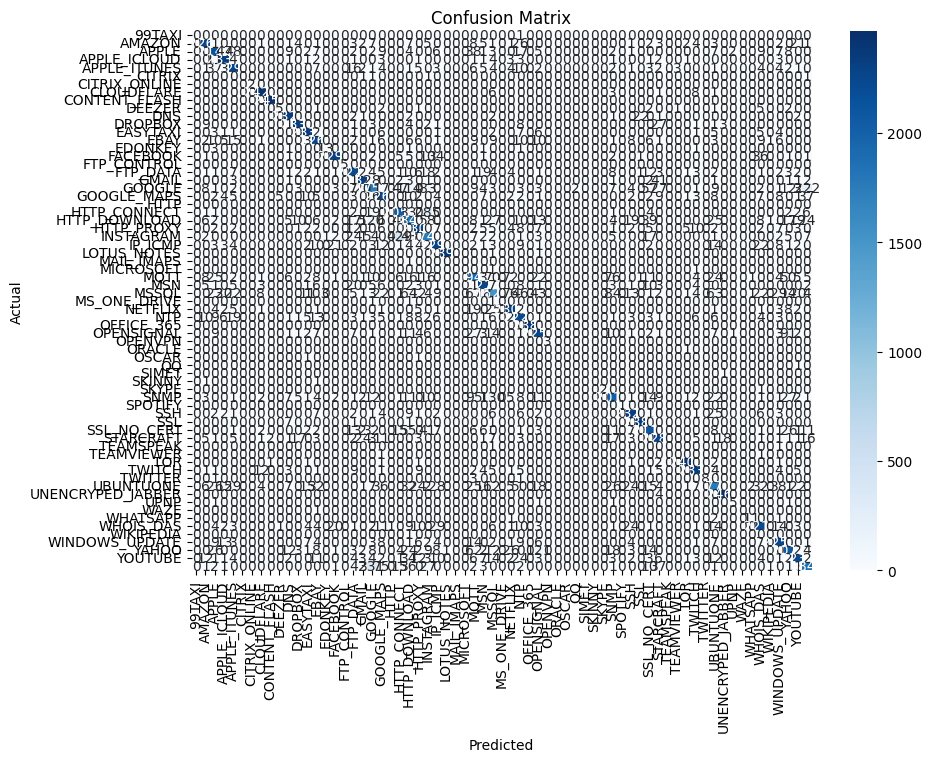

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')

# Save the figure
#plt.savefig('confusion_matrix.png')  # Specify the file name and format
plt.show() # Close the plot to free up memory


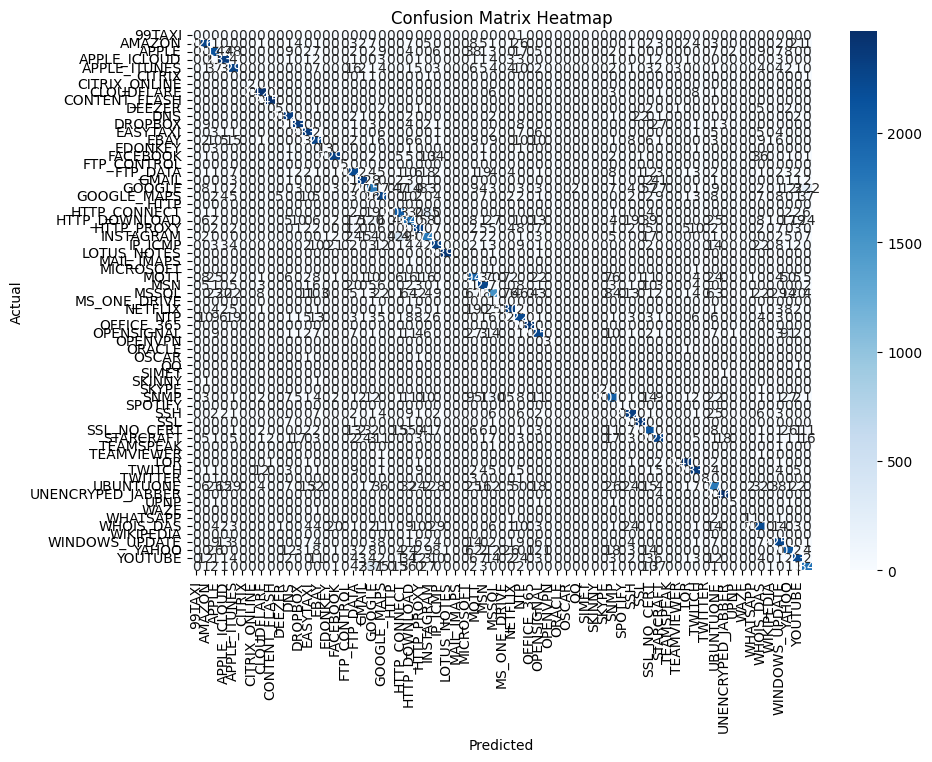

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

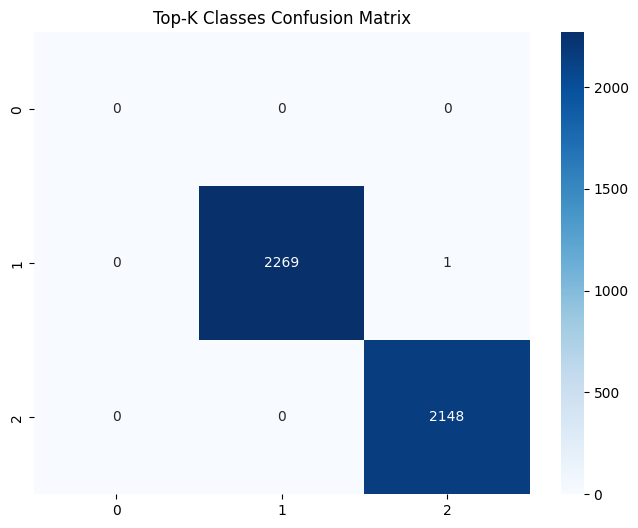

In [ ]:
top_classes = [0, 1, 2]  # Replace this with the indices of your top K classes
cm_top_k = cm[top_classes][:, top_classes]  # Extract top K classes

plt.figure(figsize=(8, 6))
sns.heatmap(cm_top_k, annot=True, fmt='d', cmap='Blues')
plt.title('Top-K Classes Confusion Matrix')
plt.show()

In [ ]:
import plotly.express as px
from sklearn.metrics import confusion_matrix

# Get the unique classes from both y_test and y_pred
unique_classes = np.union1d(np.unique(y_test), np.unique(y_pred))

# Recalculate the confusion matrix with all unique classes
cm = confusion_matrix(y_test, y_pred, labels=unique_classes)

# Convert confusion matrix to a pandas DataFrame
cm_df = pd.DataFrame(cm, index=unique_classes, columns=unique_classes)

# Plot using Plotly
fig = px.imshow(cm_df, text_auto=True, color_continuous_scale='Blues')
fig.update_layout(title='Interactive Confusion Matrix', xaxis_title='Predicted', yaxis_title='Actual')
fig.show()